In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#delayed_flights = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\DelayedFlights.csv', sep=',')
delayed_flights = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\DelayedFlights.csv', sep=',')

delayed_flights

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0                 0  2008      1           3          4   2003.0        1955   
1                 1  2008      1           3          4    754.0         735   
2                 2  2008      1           3          4    628.0         620   
3                 4  2008      1           3          4   1829.0        1755   
4                 5  2008      1           3          4   1940.0        1915   
...             ...   ...    ...         ...        ...      ...         ...   
1936753     7009710  2008     12          13          6   1250.0        1220   
1936754     7009717  2008     12          13          6    657.0         600   
1936755     7009718  2008     12          13          6   1007.0         847   
1936756     7009726  2008     12          13          6   1251.0        1240   
1936757     7009727  2008     12          13          6   1110.0        1103   

         ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0         2211.0        2225            WN  ...     4.0     8.0          0   
1         1002.0        1000            WN  ...     5.0    10.0          0   
2          804.0         750            WN  ...     3.0    17.0          0   
3         1959.0        1925            WN  ...     3.0    10.0          0   
4         2121.0        2110            WN  ...     4.0    10.0          0   
...          ...         ...           ...  ...     ...     ...        ...   
1936753   1617.0        1552            DL  ...     9.0    18.0          0   
1936754    904.0         749            DL  ...    15.0    34.0          0   
1936755   1149.0        1010            DL  ...     8.0    32.0          0   
1936756   1446.0        1437            DL  ...    13.0    13.0          0   
1936757   1413.0        1418            DL  ...     8.0    11.0          0   

         CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                       N         0           NaN           NaN      NaN   
1                       N         0           NaN           NaN      NaN   
2                       N         0           NaN           NaN      NaN   
3                       N         0           2.0           0.0      0.0   
4                       N         0           NaN           NaN      NaN   
...                   ...       ...           ...           ...      ...   
1936753                 N         0           3.0           0.0      0.0   
1936754                 N         0           0.0          57.0     18.0   
1936755                 N         0           1.0           0.0     19.0   
1936756                 N         0           NaN           NaN      NaN   
1936757                 N         0           NaN           NaN      NaN   

        SecurityDelay  LateAircraftDelay  
0                 NaN                NaN  
1                 NaN                NaN  
2                 NaN                NaN  
3                 0.0               32.0  
4                 NaN                NaN  
...               ...                ...  
1936753           0.0               22.0  
1936754           0.0                0.0  
1936755           0.0               79.0  
1936756           NaN                NaN  
1936757           NaN                NaN  

[1936758 rows x 30 columns]

In [3]:
delayed_flights.drop(columns='Unnamed: 0', inplace=True)

Abans que res, eliminarem la variable Year ja que tots els vols del dataset son del 2008 i ens sembla redundant.

In [4]:
delayed_flights.drop(columns='Year', inplace=True)

A continuació, farem neteja de valors nuls.

Observem que els vols cancelats produeixen una gran quantitat de null values a diferents variables. Pensem que lo millor serà eliminar les files, ja que el nombre de vols cancelats és petit.

In [5]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [6]:
delayed_flights[delayed_flights.Cancelled == 1].isna().sum() / len(delayed_flights[delayed_flights.Cancelled == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime              100.000000
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.000000
ActualElapsedTime    100.000000
CRSElapsedTime         0.000000
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn               100.000000
TaxiOut               71.879937
Cancelled              0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [7]:
indexes = delayed_flights[delayed_flights.Cancelled == 1].index.values

In [8]:
delayed_flights.drop(index=indexes, inplace=True)

Hem eliminat tots els vols cancelats, per tant, la variable Cancelled ja no ens aporta cap informació. Per aquest motiu, l'eliminem.

In [9]:
delayed_flights.drop(columns='Cancelled', inplace=True)

In [10]:
delayed_flights.reset_index(drop=True, inplace=True)

Sembla que els null values de les variables CarrierDelay, WeatherDelay, etc. están relacionats amb ArrDelay, és a dir, que quan el retràs no supera els 14 minuts, no es recullen valors. En aquest cas, creiem que serà convenient imputar-los per 0.

In [11]:
delayed_flights[delayed_flights.CarrierDelay.isna()].ArrDelay.max()

14.0

In [12]:
indices = delayed_flights[delayed_flights.ArrDelay < 15][['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].index.values

In [13]:
delayed_flights.iloc[indices, -5:] = delayed_flights.iloc[indices, -5:].fillna(0)

Sembla que els vols desviats també afecten als valors nuls d'altres variables. Així que els eliminarem de la mateixa forma que els cancelats.

In [14]:
delayed_flights[delayed_flights.Diverted == 1].isna().sum() / len(delayed_flights[delayed_flights.Diverted == 1]) * 100

Month                  0.000000
DayofMonth             0.000000
DayOfWeek              0.000000
DepTime                0.000000
CRSDepTime             0.000000
ArrTime               83.531081
CRSArrTime             0.000000
UniqueCarrier          0.000000
FlightNum              0.000000
TailNum                0.025793
ActualElapsedTime    100.000000
CRSElapsedTime         2.553521
AirTime              100.000000
ArrDelay             100.000000
DepDelay               0.000000
Origin                 0.000000
Dest                   0.000000
Distance               0.000000
TaxiIn                83.531081
TaxiOut                0.000000
CancellationCode       0.000000
Diverted               0.000000
CarrierDelay         100.000000
WeatherDelay         100.000000
NASDelay             100.000000
SecurityDelay        100.000000
LateAircraftDelay    100.000000
dtype: float64

In [15]:
indices = delayed_flights[delayed_flights.Diverted == 1].index.values

In [16]:
delayed_flights.drop(index=indices, inplace=True)

In [17]:
delayed_flights.drop(columns='Diverted', inplace=True)

In [18]:
delayed_flights.reset_index(drop=True, inplace=True)

In [19]:
delayed_flights.isna().sum() / len(delayed_flights) * 100

Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              0.000000
CRSDepTime           0.000000
ArrTime              0.000000
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.000156
ActualElapsedTime    0.000000
CRSElapsedTime       0.000000
AirTime              0.000000
ArrDelay             0.000000
DepDelay             0.000000
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
CancellationCode     0.000000
CarrierDelay         0.000000
WeatherDelay         0.000000
NASDelay             0.000000
SecurityDelay        0.000000
LateAircraftDelay    0.000000
dtype: float64

Per acabar, hem decidit imputar els valors nuls de TailNum per la moda.

In [20]:
delayed_flights.TailNum.fillna(delayed_flights.TailNum.mode()[0], inplace=True)

In [21]:
delayed_flights.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Separar les variables per tipus

In [22]:
cyclical = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
nominal = ['UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
numerical = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
            'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
           'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [23]:
delayed_flights[numerical].skew()

ActualElapsedTime     1.427101
CRSElapsedTime        1.439446
AirTime               1.495251
ArrDelay              3.948780
DepDelay              4.500579
Distance              1.546581
TaxiIn                5.989240
TaxiOut               4.497800
CarrierDelay          8.863144
WeatherDelay         15.595925
NASDelay              6.151299
SecurityDelay        64.912970
LateAircraftDelay     4.045036
dtype: float64

In [24]:
delayed_flights[numerical] = pd.DataFrame(data=np.ma.log(delayed_flights[numerical].values).filled(0), columns=numerical)
delayed_flights[numerical].skew()

ActualElapsedTime     0.133347
CRSElapsedTime        0.193822
AirTime               0.002158
ArrDelay             -0.596587
DepDelay              0.382507
Distance             -0.213776
TaxiIn                0.452935
TaxiOut               0.671148
CarrierDelay          1.190391
WeatherDelay          4.788023
NASDelay              1.364237
SecurityDelay        20.740511
LateAircraftDelay     0.916293
dtype: float64

Aplicarem cyclical transforming per a les variables cícliques (temporals), frequency encoding per a les nominals i estandarditzarem les variables numèriques. Les variables cancelled i diverted son binomials, però no requereixen cap tipus de transformació.

In [25]:
for column in cyclical[:3]:
    print(np.sort(delayed_flights[column].unique()))
    print('='*64)

for column in cyclical[3:]:
    print(delayed_flights[column].min(), delayed_flights[column].max())
    print('='*64)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[1 2 3 4 5 6 7]
1.0 2400.0
0 2359
1.0 2400.0
0 2359


In [26]:
delayed_flights['mnth_sin'] = np.sin((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['mnth_cos'] = np.cos((delayed_flights.Month -1)*(2.*np.pi/12))
delayed_flights['day_M_sin'] = np.sin((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_M_cos'] = np.cos((delayed_flights.DayofMonth -1)*(2.*np.pi/31))
delayed_flights['day_W_sin'] = np.sin((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))
delayed_flights['day_W_cos'] = np.cos((delayed_flights.DayOfWeek -1)*(2.*np.pi/7))

In [27]:
round(delayed_flights[['Month','mnth_sin', 'mnth_cos', 'DayofMonth', 'day_M_sin', 'day_M_cos', 'DayOfWeek', 'day_W_sin', 'day_W_cos']][::200000], 3)

Month  mnth_sin  mnth_cos  DayofMonth  day_M_sin  day_M_cos  \
0            1     0.000     1.000           3      0.394      0.919   
200000       2     0.500     0.866          15      0.299     -0.954   
400000       3     0.866     0.500          24     -0.999     -0.051   
600000       4     1.000     0.000          14      0.485     -0.874   
800000       5     0.866    -0.500          20     -0.651     -0.759   
1000000      6     0.500    -0.866          22     -0.898     -0.440   
1200000      7     0.000    -1.000           1      0.000      1.000   
1400000      8    -0.500    -0.866          20     -0.651     -0.759   
1600000     10    -1.000    -0.000          14      0.485     -0.874   
1800000     12    -0.500     0.866          22     -0.898     -0.440   

         DayOfWeek  day_W_sin  day_W_cos  
0                4      0.434     -0.901  
200000           5     -0.434     -0.901  
400000           1      0.000      1.000  
600000           1      0.000      1.000  
800000           2      0.782      0.623  
1000000          7     -0.782      0.623  
1200000          2      0.782      0.623  
1400000          3      0.975     -0.223  
1600000          2      0.782      0.623  
1800000          1      0.000      1.000

In [28]:
delayed_flights['DepTime_sin'] = np.sin((delayed_flights.DepTime)*(2.*np.pi/2400))
delayed_flights['DepTime_cos'] = np.cos((delayed_flights.DepTime)*(2.*np.pi/2400))
delayed_flights['CRSDepTime_sin'] = np.sin((delayed_flights.CRSDepTime)*(2.*np.pi/2359))
delayed_flights['CRSDepTime_cos'] = np.cos((delayed_flights.CRSDepTime)*(2.*np.pi/2359))
delayed_flights['ArrTime_sin'] = np.sin((delayed_flights.ArrTime)*(2.*np.pi/2400))
delayed_flights['ArrTime_cos'] = np.cos((delayed_flights.ArrTime)*(2.*np.pi/2400))
delayed_flights['CRSArrTime_sin'] = np.sin((delayed_flights.CRSArrTime)*(2.*np.pi/2400))
delayed_flights['CRSArrTime_cos'] = np.cos((delayed_flights.CRSArrTime)*(2.*np.pi/2400))

In [29]:
delayed_flights[delayed_flights.CRSDepTime == 0][['CRSDepTime', 'CRSDepTime_sin', 'CRSDepTime_cos']]

CRSDepTime  CRSDepTime_sin  CRSDepTime_cos
250004           0             0.0             1.0
945888           0             0.0             1.0

In [30]:
round(delayed_flights[delayed_flights.CRSDepTime == 2358][['CRSDepTime', 'CRSDepTime_sin', 'CRSDepTime_cos']], 5)

CRSDepTime  CRSDepTime_sin  CRSDepTime_cos
81472          2358        -0.00266             1.0
82440          2358        -0.00266             1.0
82838          2358        -0.00266             1.0
89259          2358        -0.00266             1.0
89748          2358        -0.00266             1.0
...             ...             ...             ...
1609959        2358        -0.00266             1.0
1610100        2358        -0.00266             1.0
1610180        2358        -0.00266             1.0
1611059        2358        -0.00266             1.0
1712917        2358        -0.00266             1.0

[147 rows x 3 columns]

Com podem observar, hem aconseguit que els valors siguin cíclics, de forma que la última hora/dia estigui a prop de la primera, que és com passa en el temps cíclic.

In [31]:
delayed_flights.drop(columns=cyclical, inplace=True)

In [32]:
cyclical = ['mnth_sin', 'mnth_cos', 'day_M_sin', 'day_M_cos', 'day_W_sin', 'day_W_cos', 'DepTime_sin', 'DepTime_cos', 'ArrTime_sin',
       'ArrTime_cos', 'CRSDepTime_sin', 'CRSDepTime_cos', 'CRSArrTime_sin',
       'CRSArrTime_cos']

In [33]:
delayed_flights[cyclical]

mnth_sin  mnth_cos  day_M_sin  day_M_cos  day_W_sin  day_W_cos  \
0             0.0  1.000000   0.394356   0.918958   0.433884  -0.900969   
1             0.0  1.000000   0.394356   0.918958   0.433884  -0.900969   
2             0.0  1.000000   0.394356   0.918958   0.433884  -0.900969   
3             0.0  1.000000   0.394356   0.918958   0.433884  -0.900969   
4             0.0  1.000000   0.394356   0.918958   0.433884  -0.900969   
...           ...       ...        ...        ...        ...        ...   
1928366      -0.5  0.866025   0.651372  -0.758758  -0.974928  -0.222521   
1928367      -0.5  0.866025   0.651372  -0.758758  -0.974928  -0.222521   
1928368      -0.5  0.866025   0.651372  -0.758758  -0.974928  -0.222521   
1928369      -0.5  0.866025   0.651372  -0.758758  -0.974928  -0.222521   
1928370      -0.5  0.866025   0.651372  -0.758758  -0.974928  -0.222521   

         DepTime_sin  DepTime_cos  ArrTime_sin  ArrTime_cos  CRSDepTime_sin  \
0          -0.862072     0.506786    -0.474856     0.880063       -0.880090   
1           0.919821    -0.392337     0.495459    -0.868632        0.926094   
2           0.997314    -0.073238     0.860742    -0.509041        0.996756   
3          -0.997119     0.075849    -0.914607     0.404344       -0.999280   
4          -0.933580     0.358368    -0.667183     0.744894       -0.925590   
...              ...          ...          ...          ...             ...   
1928366    -0.130526    -0.991445    -0.887413    -0.460974       -0.107662   
1928367     0.988886    -0.148672     0.699663    -0.714473        0.999627   
1928368     0.484046    -0.875042     0.133121    -0.991100        0.774303   
1928369    -0.133121    -0.991100    -0.600420    -0.799685       -0.160445   
1928370     0.233445    -0.972370    -0.529179    -0.848510        0.202350   

         CRSDepTime_cos  CRSArrTime_sin  CRSArrTime_cos  
0              0.474807       -0.442289        0.896873  
1             -0.377294        0.500000       -0.866025  
2             -0.080484        0.923880       -0.382683  
3             -0.037946       -0.946930        0.321439  
4              0.378527       -0.688355        0.725374  
...                 ...             ...             ...  
1928366       -0.994188       -0.796530       -0.604599  
1928367       -0.027297        0.924878       -0.380263  
1928368       -0.632816        0.477159       -0.878817  
1928369       -0.987045       -0.581413       -0.813608  
1928370       -0.979313       -0.540240       -0.841511  

[1928371 rows x 14 columns]

In [34]:
for column in nominal:
    mapping = delayed_flights[column].value_counts() / len(delayed_flights)
    delayed_flights[column] = delayed_flights[column].map(mapping)

In [35]:
delayed_flights[nominal]

UniqueCarrier  FlightNum   TailNum    Origin      Dest  \
0             0.195087   0.000373  0.000332  0.011429  0.011712   
1             0.195087   0.000083  0.000334  0.011429  0.011712   
2             0.195087   0.000571  0.000311  0.005016  0.015323   
3             0.195087   0.000200  0.000365  0.005016  0.015323   
4             0.195087   0.000639  0.000334  0.005016  0.004954   
...                ...        ...       ...       ...       ...   
1928366       0.058976   0.000331  0.000230  0.016746  0.055249   
1928367       0.058976   0.000212  0.000149  0.002468  0.055249   
1928368       0.058976   0.000212  0.000193  0.068043  0.022625   
1928369       0.058976   0.000279  0.000155  0.011429  0.055249   
1928370       0.058976   0.000135  0.000220  0.005631  0.055249   

         CancellationCode  
0                     1.0  
1                     1.0  
2                     1.0  
3                     1.0  
4                     1.0  
...                   ...  
1928366               1.0  
1928367               1.0  
1928368               1.0  
1928369               1.0  
1928370               1.0  

[1928371 rows x 6 columns]

In [36]:
scaler = StandardScaler()
delayed_flights[numerical] = scaler.fit_transform(delayed_flights[numerical])
delayed_flights[numerical]

ActualElapsedTime  CRSElapsedTime   AirTime  ArrDelay  DepDelay  \
0                 0.176502        0.477836  0.413230 -1.971519 -1.247490   
1                 0.176502        0.408951  0.369975 -1.507232 -0.344573   
2                -0.391238       -0.560111 -0.284821 -0.203814 -1.247490   
3                -0.518605       -0.560111 -0.263242  0.390523  0.262858   
4                -0.291039       -0.062047 -0.061675 -0.365351 -0.058106   
...                    ...             ...       ...       ...       ...   
1928366           0.449638        0.504749  0.469194  0.184562  0.132208   
1928367           0.161023       -0.170924 -0.241941  0.920439  0.802199   
1928368           0.641390        0.380730  0.496481  1.106403  1.156034   
1928369          -0.034856       -0.027013 -0.024155 -0.499765 -0.915076   
1928370           0.097866        0.263754  0.232964 -1.971519 -1.386875   

         Distance    TaxiIn   TaxiOut  CarrierDelay  WeatherDelay  NASDelay  \
0        0.429530 -0.655909 -1.158817     -0.643736     -0.217514 -0.617016   
1        0.429530 -0.251732 -0.757698     -0.643736     -0.217514 -0.617016   
2       -0.167982 -1.176984  0.196150     -0.643736     -0.217514 -0.617016   
3       -0.167982 -1.176984 -0.757698     -0.198431     -0.217514 -0.617016   
4        0.214145 -0.655909 -0.757698     -0.643736     -0.217514 -0.617016   
...           ...       ...       ...           ...           ...       ...   
1928366  0.577309  0.812917  0.298897      0.062056     -0.217514 -0.617016   
1928367 -0.258096  1.738168  1.442139     -0.643736      5.116984  1.397736   
1928368  0.216061  0.599578  1.333162     -0.643736     -0.217514  1.435423   
1928369 -0.122655  1.478972 -0.286077     -0.643736     -0.217514 -0.617016   
1928370  0.529865  0.599578 -0.586370     -0.643736     -0.217514 -0.617016   

         SecurityDelay  LateAircraftDelay  
0            -0.052188          -0.699704  
1            -0.052188          -0.699704  
2            -0.052188          -0.699704  
3            -0.052188           1.309586  
4            -0.052188          -0.699704  
...                ...                ...  
1928366      -0.052188           1.092354  
1928367      -0.052188          -0.699704  
1928368      -0.052188           1.833521  
1928369      -0.052188          -0.699704  
1928370      -0.052188          -0.699704  

[1928371 rows x 13 columns]

In [37]:
delayed_flights

UniqueCarrier  FlightNum   TailNum  ActualElapsedTime  \
0             0.195087   0.000373  0.000332           0.176502   
1             0.195087   0.000083  0.000334           0.176502   
2             0.195087   0.000571  0.000311          -0.391238   
3             0.195087   0.000200  0.000365          -0.518605   
4             0.195087   0.000639  0.000334          -0.291039   
...                ...        ...       ...                ...   
1928366       0.058976   0.000331  0.000230           0.449638   
1928367       0.058976   0.000212  0.000149           0.161023   
1928368       0.058976   0.000212  0.000193           0.641390   
1928369       0.058976   0.000279  0.000155          -0.034856   
1928370       0.058976   0.000135  0.000220           0.097866   

         CRSElapsedTime   AirTime  ArrDelay  DepDelay    Origin      Dest  \
0              0.477836  0.413230 -1.971519 -1.247490  0.011429  0.011712   
1              0.408951  0.369975 -1.507232 -0.344573  0.011429  0.011712   
2             -0.560111 -0.284821 -0.203814 -1.247490  0.005016  0.015323   
3             -0.560111 -0.263242  0.390523  0.262858  0.005016  0.015323   
4             -0.062047 -0.061675 -0.365351 -0.058106  0.005016  0.004954   
...                 ...       ...       ...       ...       ...       ...   
1928366        0.504749  0.469194  0.184562  0.132208  0.016746  0.055249   
1928367       -0.170924 -0.241941  0.920439  0.802199  0.002468  0.055249   
1928368        0.380730  0.496481  1.106403  1.156034  0.068043  0.022625   
1928369       -0.027013 -0.024155 -0.499765 -0.915076  0.011429  0.055249   
1928370        0.263754  0.232964 -1.971519 -1.386875  0.005631  0.055249   

         ...  day_W_sin  day_W_cos  DepTime_sin  DepTime_cos  CRSDepTime_sin  \
0        ...   0.433884  -0.900969    -0.862072     0.506786       -0.880090   
1        ...   0.433884  -0.900969     0.919821    -0.392337        0.926094   
2        ...   0.433884  -0.900969     0.997314    -0.073238        0.996756   
3        ...   0.433884  -0.900969    -0.997119     0.075849       -0.999280   
4        ...   0.433884  -0.900969    -0.933580     0.358368       -0.925590   
...      ...        ...        ...          ...          ...             ...   
1928366  ...  -0.974928  -0.222521    -0.130526    -0.991445       -0.107662   
1928367  ...  -0.974928  -0.222521     0.988886    -0.148672        0.999627   
1928368  ...  -0.974928  -0.222521     0.484046    -0.875042        0.774303   
1928369  ...  -0.974928  -0.222521    -0.133121    -0.991100       -0.160445   
1928370  ...  -0.974928  -0.222521     0.233445    -0.972370        0.202350   

         CRSDepTime_cos  ArrTime_sin  ArrTime_cos  CRSArrTime_sin  \
0              0.474807    -0.474856     0.880063       -0.442289   
1             -0.377294     0.495459    -0.868632        0.500000   
2             -0.080484     0.860742    -0.509041        0.923880   
3             -0.037946    -0.914607     0.404344       -0.946930   
4              0.378527    -0.667183     0.744894       -0.688355   
...                 ...          ...          ...             ...   
1928366       -0.994188    -0.887413    -0.460974       -0.796530   
1928367       -0.027297     0.699663    -0.714473        0.924878   
1928368       -0.632816     0.133121    -0.991100        0.477159   
1928369       -0.987045    -0.600420    -0.799685       -0.581413   
1928370       -0.979313    -0.529179    -0.848510       -0.540240   

         CRSArrTime_cos  
0              0.896873  
1             -0.866025  
2             -0.382683  
3              0.321439  
4              0.725374  
...                 ...  
1928366       -0.604599  
1928367       -0.380263  
1928368       -0.878817  
1928369       -0.813608  
1928370       -0.841511  

[1928371 rows x 33 columns]

Ahora que tenemos nuestro data set preprocesado, aplicaremos PCA para el clustering.

In [38]:
pca = PCA(random_state=42)
pca.fit(delayed_flights)

PCA(random_state=42)

Antes que nada, observaremos la influencia de cada variable en cada componente principal para descubrir si alguna variable presenta un mayor peso que otras sobre los valores.

<AxesSubplot:>

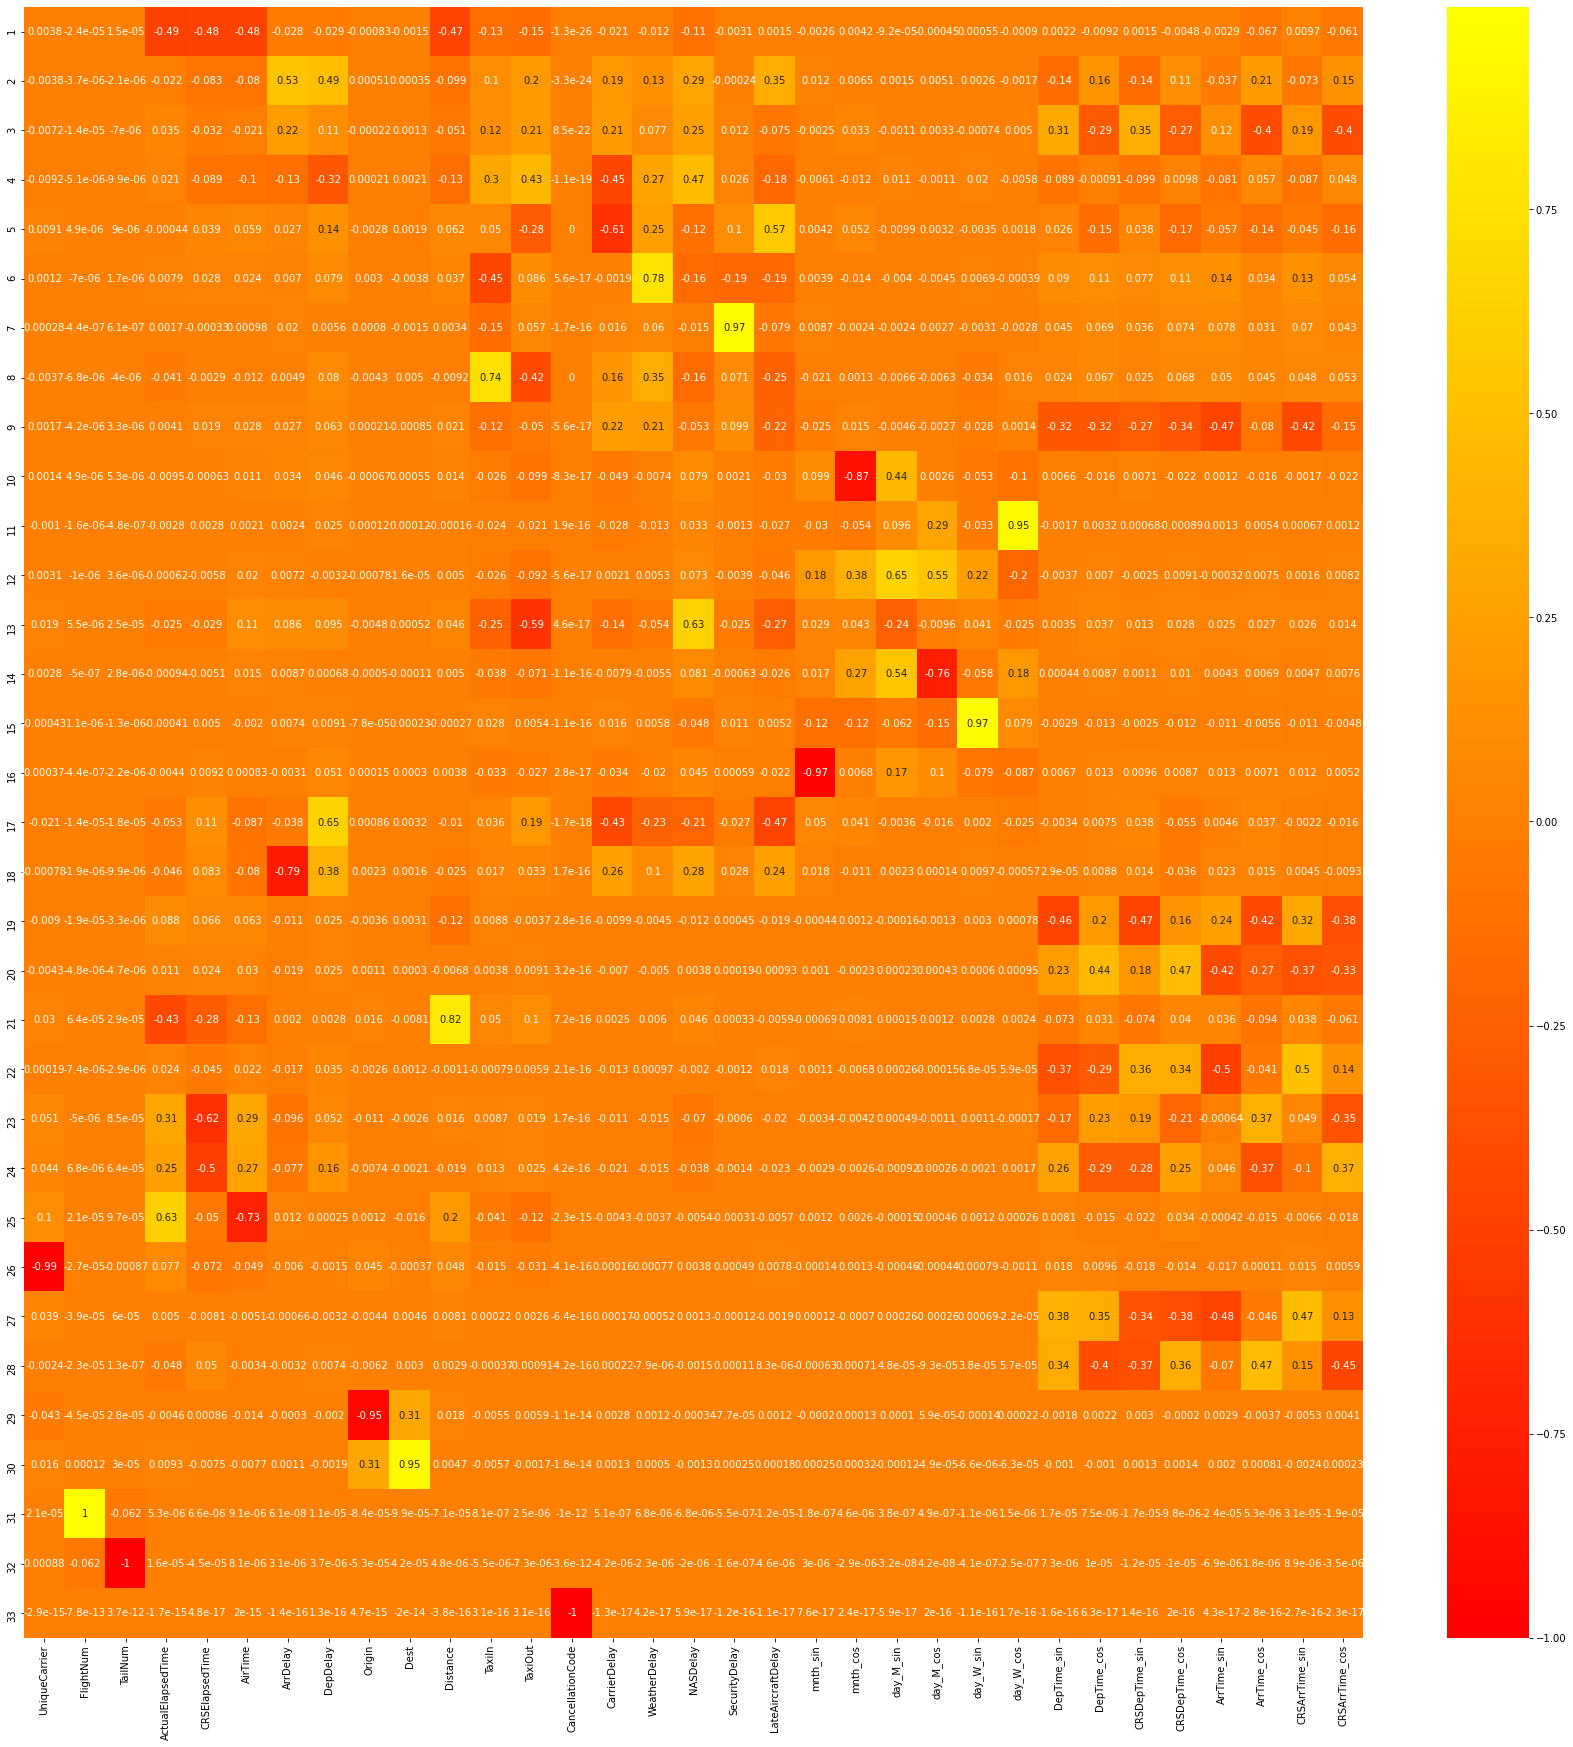

In [39]:
componentes = pd.DataFrame(data = pca.components_, columns=delayed_flights.columns, 
             index=np.arange(pca.n_components_) + 1)

plt.figure(figsize=(30,30))
sns.heatmap(componentes, annot=True, fmt='.2g', cmap='autumn')

Los pesos asignados a cada variable en el PC1 son equitativos por lo general, por tanto no podemos concluir que x variable en concreto tenga mayor peso sobre las otras.

Ahora, nos dispondremos a observar el porcentaje de varianza acumulada.

Text(0, 0.5, 'Por. varianza acumulada')

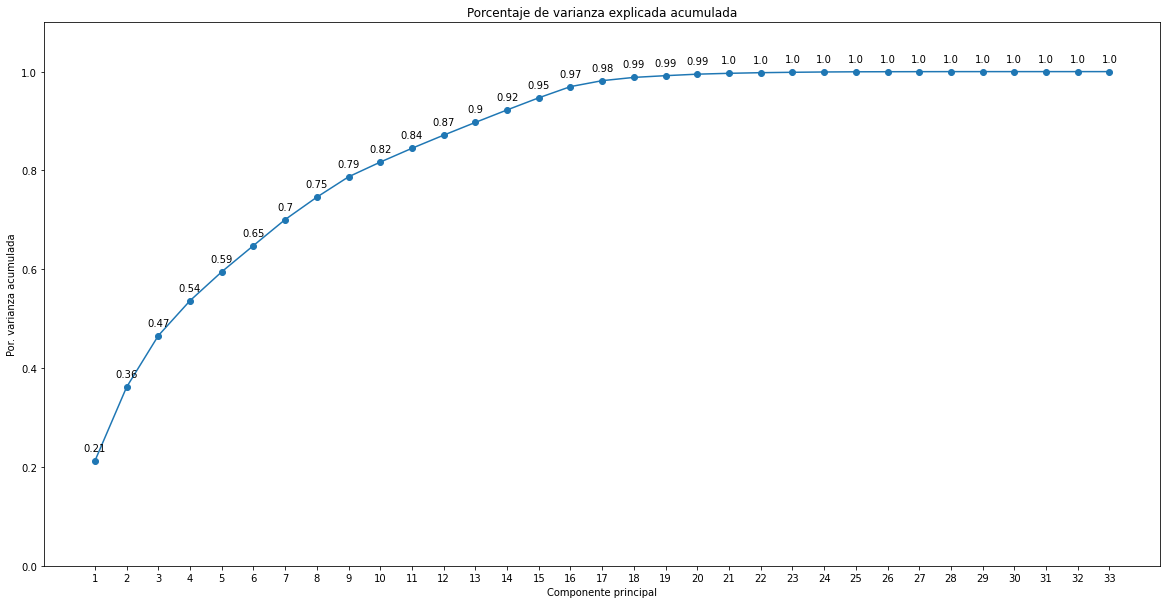

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
var_acumulada = pca.explained_variance_ratio_.cumsum()

ax.plot(
        np.arange(pca.n_components_) + 1,
        var_acumulada,
        marker='o')

for x, y in zip(np.arange(pca.n_components_) + 1, var_acumulada):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

Podemos observar que con 21 componentes ya seríamos capaces de explicar el total de varianza del data set. Por ende, consideramos que será más efectivo utilizar estos 21 componentes de cara al clustering.

In [41]:
pca_clustering = PCA(n_components=21, random_state=42)

clustering_array = pca_clustering.fit_transform(delayed_flights)

In [42]:
cluster_df = pd.DataFrame(data=clustering_array, columns=np.arange(pca_clustering.n_components_)+1)
cluster_df

1         2         3         4         5         6         7   \
0       -0.411788 -1.943897 -2.706942  0.080649 -0.373836  0.366048  0.126979   
1       -0.261629 -2.602236  1.025226 -0.648166  0.472945  0.497666  0.135423   
2        0.997055 -1.888177  1.018847 -0.207571 -0.303504  1.087173  0.488005   
3        1.002434  0.855117 -1.531548 -0.975613  0.861561  0.020752 -0.057397   
4        0.289480 -0.366503 -2.021508 -0.180809 -0.242741  0.360000  0.120391   
...           ...       ...       ...       ...       ...       ...       ...   
1928366 -0.982510 -0.041164  0.786749 -0.485346  1.109383 -0.808857 -0.411711   
1928367 -0.378898  1.430599  3.101629  2.780298  0.936170  3.837533  0.414262   
1928368 -1.198591  1.447303  2.700721  0.283566  1.515379 -0.582837 -0.162342   
1928369  0.185549 -1.684622  0.775540  0.639395  0.510078 -0.922278 -0.423034   
1928370 -0.232375 -3.073536  0.467140  0.365053  0.538055 -0.483579 -0.298693   

               8         9         10  ...        12        13        14  \
0        0.106693 -0.440410 -0.664719  ...  1.533219  0.562438 -0.333645   
1        0.205516 -1.383209 -0.533436  ...  1.434166  0.299865 -0.403611   
2       -0.784047 -2.087341 -0.638581  ...  1.384385 -0.002239 -0.417755   
3       -0.865020  0.298411 -0.595303  ...  1.405216  0.064358 -0.404127   
4        0.013817 -0.025523 -0.589026  ...  1.492554  0.519357 -0.359212   
...           ...       ...       ...  ...       ...       ...       ...   
1928366  0.103142  0.480048 -0.497079  ... -0.102589 -1.223458  1.006022   
1928367  2.588397 -1.184980 -0.408147  ...  0.022421 -0.354250  1.104583   
1928368 -0.902223 -1.423895 -0.333112  ... -0.080165 -0.353825  1.112443   
1928369  1.116266  0.384069 -0.440923  ... -0.001292 -0.672429  1.057628   
1928370  0.550296  0.197130 -0.442752  ...  0.044403 -0.397512  1.105757   

               15        16        17        18        19        20        21  
0        0.013669  0.347488 -0.190323  0.470348  0.025799 -0.051638 -0.100738  
1        0.048024  0.380402  0.535661  0.524859 -0.000774  0.206257  0.004436  
2        0.004284  0.349587  0.016491 -0.813381 -0.201272 -0.137875  0.140261  
3        0.074662  0.323425 -0.371748 -0.208934 -0.013208  0.096160  0.125199  
4        0.046875  0.376996  0.607989 -0.326000 -0.039542  0.049573  0.189373  
...           ...       ...       ...       ...       ...       ...       ...  
1928366 -0.826842  0.625217 -0.156437 -0.032586 -0.294446  0.078423  0.075837  
1928367 -0.935419  0.713983 -0.031501  0.218704 -0.060401  0.025198  0.127209  
1928368 -0.948517  0.792495  0.156149  0.231192  0.101548 -0.031487 -0.023762  
1928369 -0.850062  0.628565  0.243151 -0.471589  0.096005 -0.003378 -0.035571  
1928370 -0.894140  0.657804 -0.088387  0.478863 -0.207609  0.156882  0.207964  

[1928371 rows x 21 columns]

- Exercici 1
Classifica els diferents vols utilitzant l'algorisme de K-means.

Utilitzarem elbow method per esbrinar la quantitat de clústers óptima.

In [68]:
inertias = []
for k in range(1, 30, 2):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df.sample(frac=0.04, random_state=42))
    inertias.append(kmeans.inertia_)

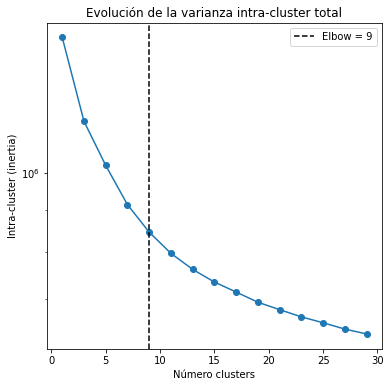

In [73]:
kl = KneeLocator(
        range(1, 30, 2), inertias, curve="convex", direction="decreasing"
    )

elbow = kl.elbow

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(range(1, 30, 2), inertias, marker='o')
ax.set_yscale('log')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
ax.axvline(x=elbow, c = 'black', linestyle='--', label=f'Elbow = {elbow}')
ax.legend()

El métode elbow ens sugereix utilitzar 9 clústers per al nostre algoritme k-means.

In [43]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(cluster_df.sample(frac=0.1, random_state=42))

KMeans(n_clusters=9, random_state=42)

A continuació representarem el clustering realitzat per kmeans, tot i que s'ha de tenir en compte que la representació gràfica es realitza només a partir d'un sample de l'1% i amb 2 components principals (com haviem vist abans, expliquen només un 36% de la variabilitat de tot el data set).

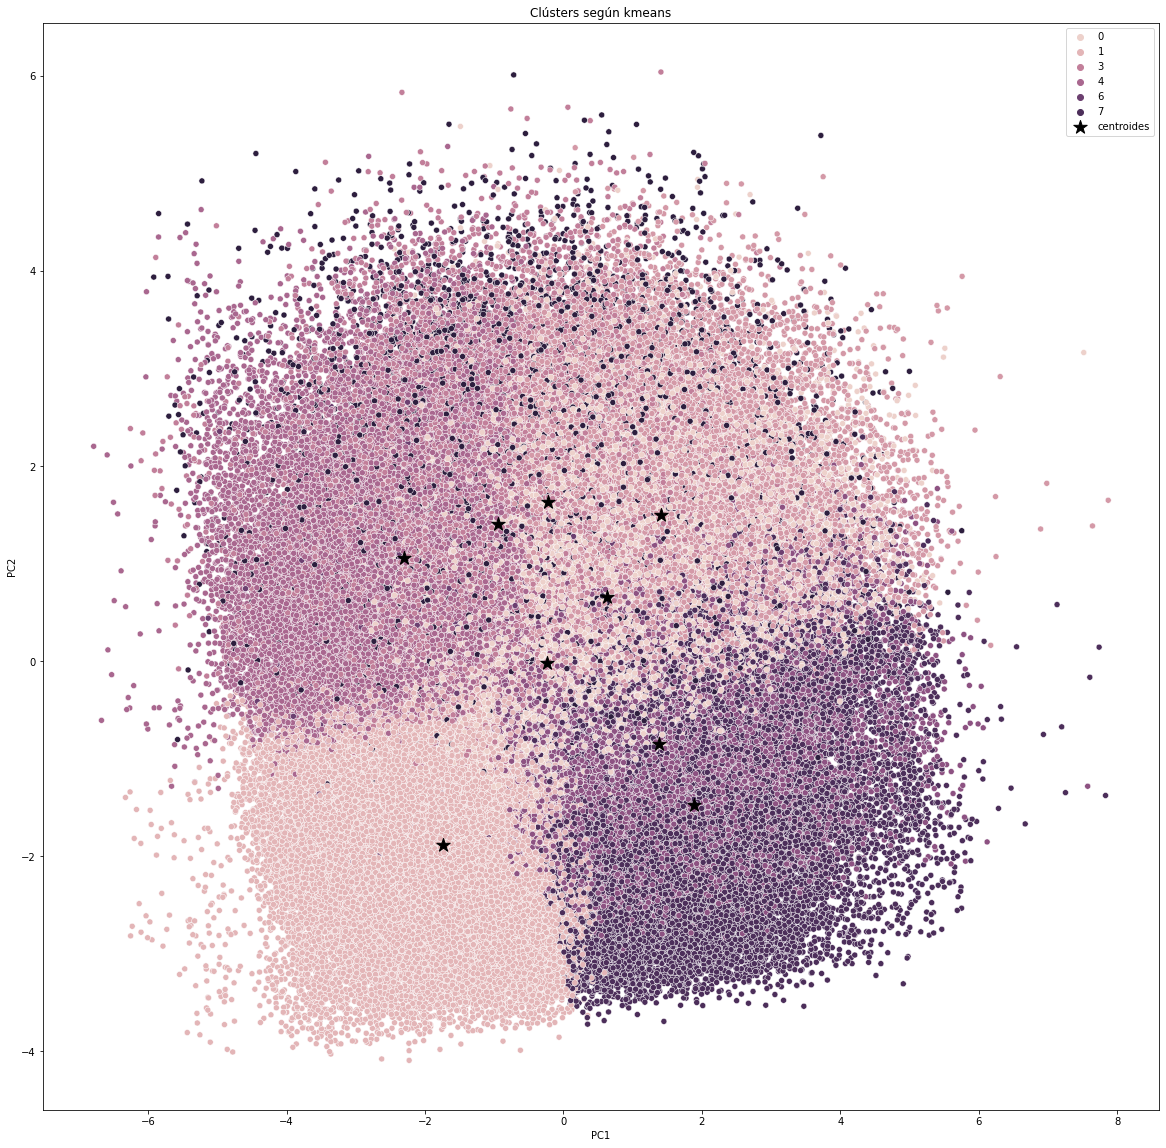

In [80]:
sample_plot = cluster_df.sample(frac=0.1, random_state=42)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(x=sample_plot[1], y=sample_plot[2], hue=kmeans.labels_)
ax.set_title("Clústers según kmeans")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.scatter(
    x = kmeans.cluster_centers_[:, 0],
    y = kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax.legend()

In [44]:
agrupament = kmeans.predict(cluster_df)

kmeans_classified = delayed_flights.copy(deep=True)
kmeans_classified['Group'] = agrupament
kmeans_classified

UniqueCarrier  FlightNum   TailNum  ActualElapsedTime  \
0             0.195087   0.000373  0.000332           0.176502   
1             0.195087   0.000083  0.000334           0.176502   
2             0.195087   0.000571  0.000311          -0.391238   
3             0.195087   0.000200  0.000365          -0.518605   
4             0.195087   0.000639  0.000334          -0.291039   
...                ...        ...       ...                ...   
1928366       0.058976   0.000331  0.000230           0.449638   
1928367       0.058976   0.000212  0.000149           0.161023   
1928368       0.058976   0.000212  0.000193           0.641390   
1928369       0.058976   0.000279  0.000155          -0.034856   
1928370       0.058976   0.000135  0.000220           0.097866   

         CRSElapsedTime   AirTime  ArrDelay  DepDelay    Origin      Dest  \
0              0.477836  0.413230 -1.971519 -1.247490  0.011429  0.011712   
1              0.408951  0.369975 -1.507232 -0.344573  0.011429  0.011712   
2             -0.560111 -0.284821 -0.203814 -1.247490  0.005016  0.015323   
3             -0.560111 -0.263242  0.390523  0.262858  0.005016  0.015323   
4             -0.062047 -0.061675 -0.365351 -0.058106  0.005016  0.004954   
...                 ...       ...       ...       ...       ...       ...   
1928366        0.504749  0.469194  0.184562  0.132208  0.016746  0.055249   
1928367       -0.170924 -0.241941  0.920439  0.802199  0.002468  0.055249   
1928368        0.380730  0.496481  1.106403  1.156034  0.068043  0.022625   
1928369       -0.027013 -0.024155 -0.499765 -0.915076  0.011429  0.055249   
1928370        0.263754  0.232964 -1.971519 -1.386875  0.005631  0.055249   

         ...  day_W_cos  DepTime_sin  DepTime_cos  CRSDepTime_sin  \
0        ...  -0.900969    -0.862072     0.506786       -0.880090   
1        ...  -0.900969     0.919821    -0.392337        0.926094   
2        ...  -0.900969     0.997314    -0.073238        0.996756   
3        ...  -0.900969    -0.997119     0.075849       -0.999280   
4        ...  -0.900969    -0.933580     0.358368       -0.925590   
...      ...        ...          ...          ...             ...   
1928366  ...  -0.222521    -0.130526    -0.991445       -0.107662   
1928367  ...  -0.222521     0.988886    -0.148672        0.999627   
1928368  ...  -0.222521     0.484046    -0.875042        0.774303   
1928369  ...  -0.222521    -0.133121    -0.991100       -0.160445   
1928370  ...  -0.222521     0.233445    -0.972370        0.202350   

         CRSDepTime_cos  ArrTime_sin  ArrTime_cos  CRSArrTime_sin  \
0              0.474807    -0.474856     0.880063       -0.442289   
1             -0.377294     0.495459    -0.868632        0.500000   
2             -0.080484     0.860742    -0.509041        0.923880   
3             -0.037946    -0.914607     0.404344       -0.946930   
4              0.378527    -0.667183     0.744894       -0.688355   
...                 ...          ...          ...             ...   
1928366       -0.994188    -0.887413    -0.460974       -0.796530   
1928367       -0.027297     0.699663    -0.714473        0.924878   
1928368       -0.632816     0.133121    -0.991100        0.477159   
1928369       -0.987045    -0.600420    -0.799685       -0.581413   
1928370       -0.979313    -0.529179    -0.848510       -0.540240   

         CRSArrTime_cos  Group  
0              0.896873      5  
1             -0.866025      1  
2             -0.382683      7  
3              0.321439      2  
4              0.725374      5  
...                 ...    ...  
1928366       -0.604599      4  
1928367       -0.380263      8  
1928368       -0.878817      3  
1928369       -0.813608      7  
1928370       -0.841511      1  

[1928371 rows x 34 columns]

Distribució dels grups: el grup 2 és el que més vols agrupa i el 7 el que menys.

<AxesSubplot:xlabel='Group', ylabel='count'>

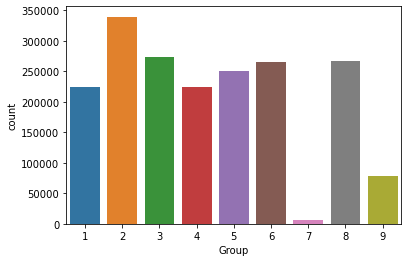

In [114]:
sns.countplot(x=kmeans_classified.Group+1)

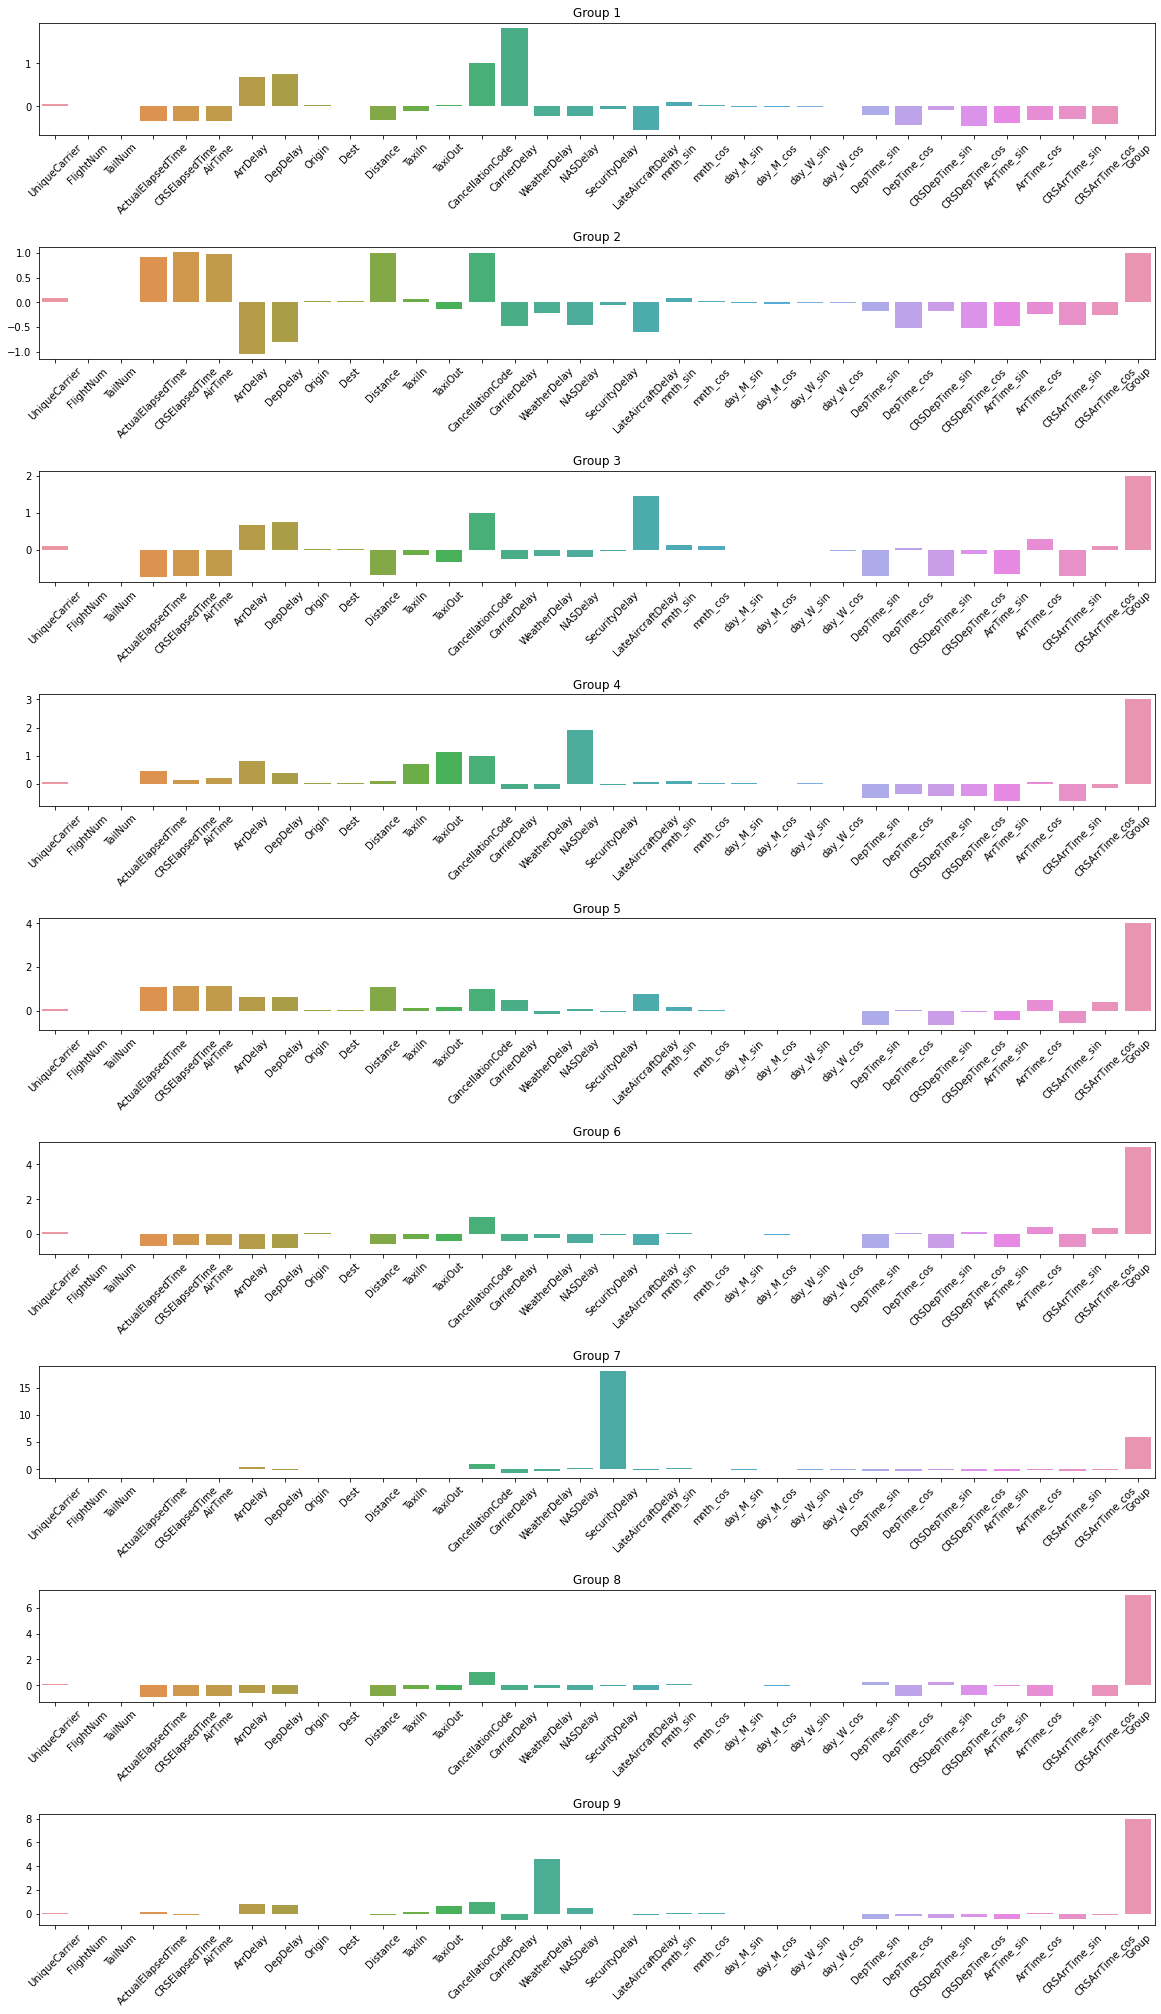

In [116]:
fig, ax = plt.subplots(nrows=9, figsize=(20, 35))
plt.subplots_adjust(hspace = 1)

i=0
for group in np.sort(kmeans_classified.Group.unique()):
    means = []
    for column in kmeans_classified:
        means.append(kmeans_classified[kmeans_classified.Group == group][column].mean())

    sns.barplot(y=means, x=kmeans_classified.columns, ax=ax[i])
    ax[i].set_title(f'Group {group+1}')
    ax[i].set_xticklabels(labels=kmeans_classified.columns, rotation=45)
    i+=1

Segons el que ens diu la gràfica:

- El grup 1 es concentra en els vols el retràs dels quals son deguts especialment a l'aerolínea.
- El grup 2 es caracteritza per una mitjana de retràs de vols per sota de la resta.
- El grup 3 es concentra en els vols el retràs dels quals estan relacionats amb la variable LateAircraftDelay.
- El grup 4 es concentra en els vols el retràs dels quals estan relacionats amb la variable NASDelay.
- El grup 7 es concentra en els vols el retràs dels quals son deguts especialment a motius de seguretat.
- El grup 9 es concentra en els vols el retràs dels quals son deguts especialment al clima.

Dels grups 5, 6 i 8 no hem sigut capaços d'extreure conclusions.

- Exercici 2
Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

Donat que el clustering jeràrquic és computacionalment costòs, realitzarem un PCA amb una variança més reduïda.

In [45]:
pca_hierarchical = PCA(n_components=0.8, random_state=42)

hierarchical_array = pca_hierarchical.fit_transform(delayed_flights)
hier_df = pd.DataFrame(data=hierarchical_array, columns=np.arange(pca_hierarchical.n_components_)+1)
hier_df

1         2         3         4         5         6         7   \
0       -0.411788 -1.943897 -2.706942  0.080649 -0.373836  0.366048  0.126979   
1       -0.261629 -2.602236  1.025226 -0.648166  0.472945  0.497666  0.135423   
2        0.997055 -1.888177  1.018847 -0.207571 -0.303504  1.087173  0.488005   
3        1.002434  0.855117 -1.531548 -0.975613  0.861561  0.020752 -0.057397   
4        0.289480 -0.366503 -2.021508 -0.180809 -0.242741  0.360000  0.120391   
...           ...       ...       ...       ...       ...       ...       ...   
1928366 -0.982510 -0.041164  0.786749 -0.485346  1.109383 -0.808857 -0.411711   
1928367 -0.378898  1.430599  3.101629  2.780298  0.936170  3.837533  0.414262   
1928368 -1.198591  1.447303  2.700721  0.283566  1.515379 -0.582837 -0.162342   
1928369  0.185549 -1.684622  0.775540  0.639395  0.510078 -0.922278 -0.423034   
1928370 -0.232375 -3.073536  0.467140  0.365053  0.538055 -0.483579 -0.298693   

               8         9         10  
0        0.106693 -0.440410 -0.664719  
1        0.205516 -1.383209 -0.533436  
2       -0.784047 -2.087341 -0.638581  
3       -0.865020  0.298411 -0.595303  
4        0.013817 -0.025523 -0.589026  
...           ...       ...       ...  
1928366  0.103142  0.480048 -0.497079  
1928367  2.588397 -1.184980 -0.408147  
1928368 -0.902223 -1.423895 -0.333112  
1928369  1.116266  0.384069 -0.440923  
1928370  0.550296  0.197130 -0.442752  

[1928371 rows x 10 columns]

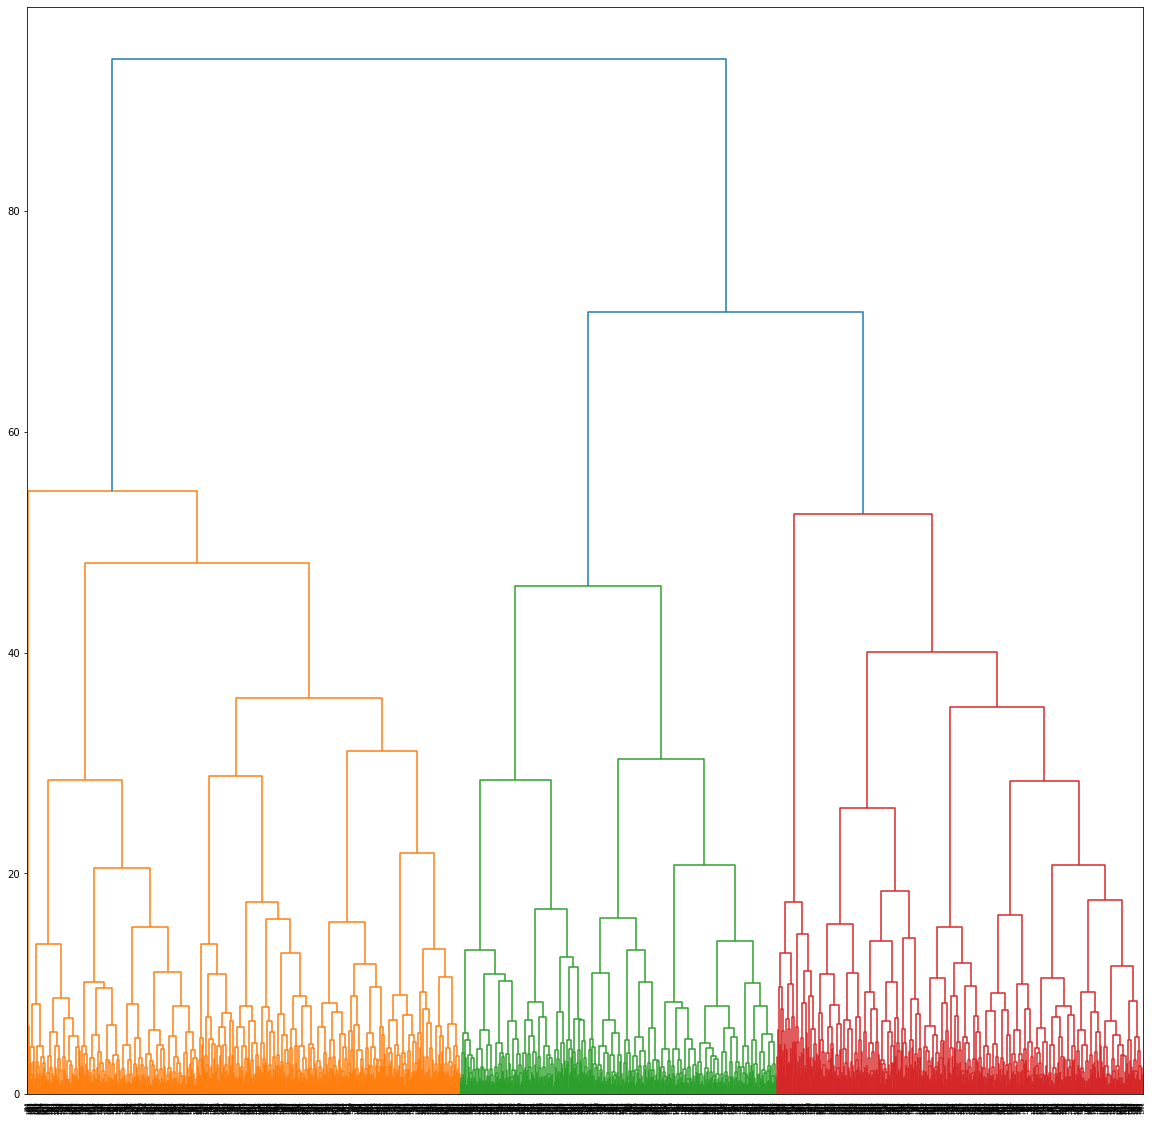

In [124]:
plt.figure(figsize=(20, 20))    
dend = shc.dendrogram(shc.linkage(hier_df.sample(frac=0.001, random_state=42), method='ward'))

Text(0, 0.5, 'Media índices silhouette')

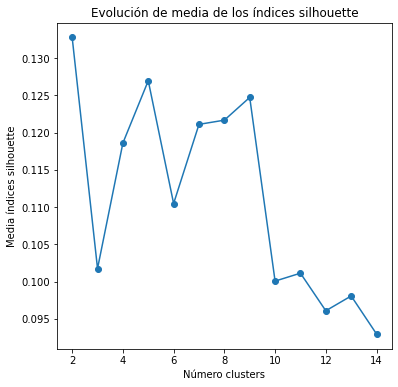

In [47]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    hier = AgglomerativeClustering(
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = hier.fit_predict(hier_df.sample(frac=0.001, random_state=42))
    silhouette_avg = silhouette_score(hier_df.sample(frac=0.001, random_state=42), cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

Els índex silhouette, acompanyats pel dendograma, ens suggereix que la millor opció serà utilitzar dos clústers.

In [46]:
hier = AgglomerativeClustering(
                    linkage    = 'ward',
                    n_clusters = 2
             )

hier.fit(hier_df.sample(frac=0.01, random_state=42))

AgglomerativeClustering()

Recordem, un altre cop, la poca fiabilitat de la gràfica que mostrarem a continuació. Tot i que resulta útil per intentar fer-nos una idea aproximada.

Text(0, 0.5, 'PC2')

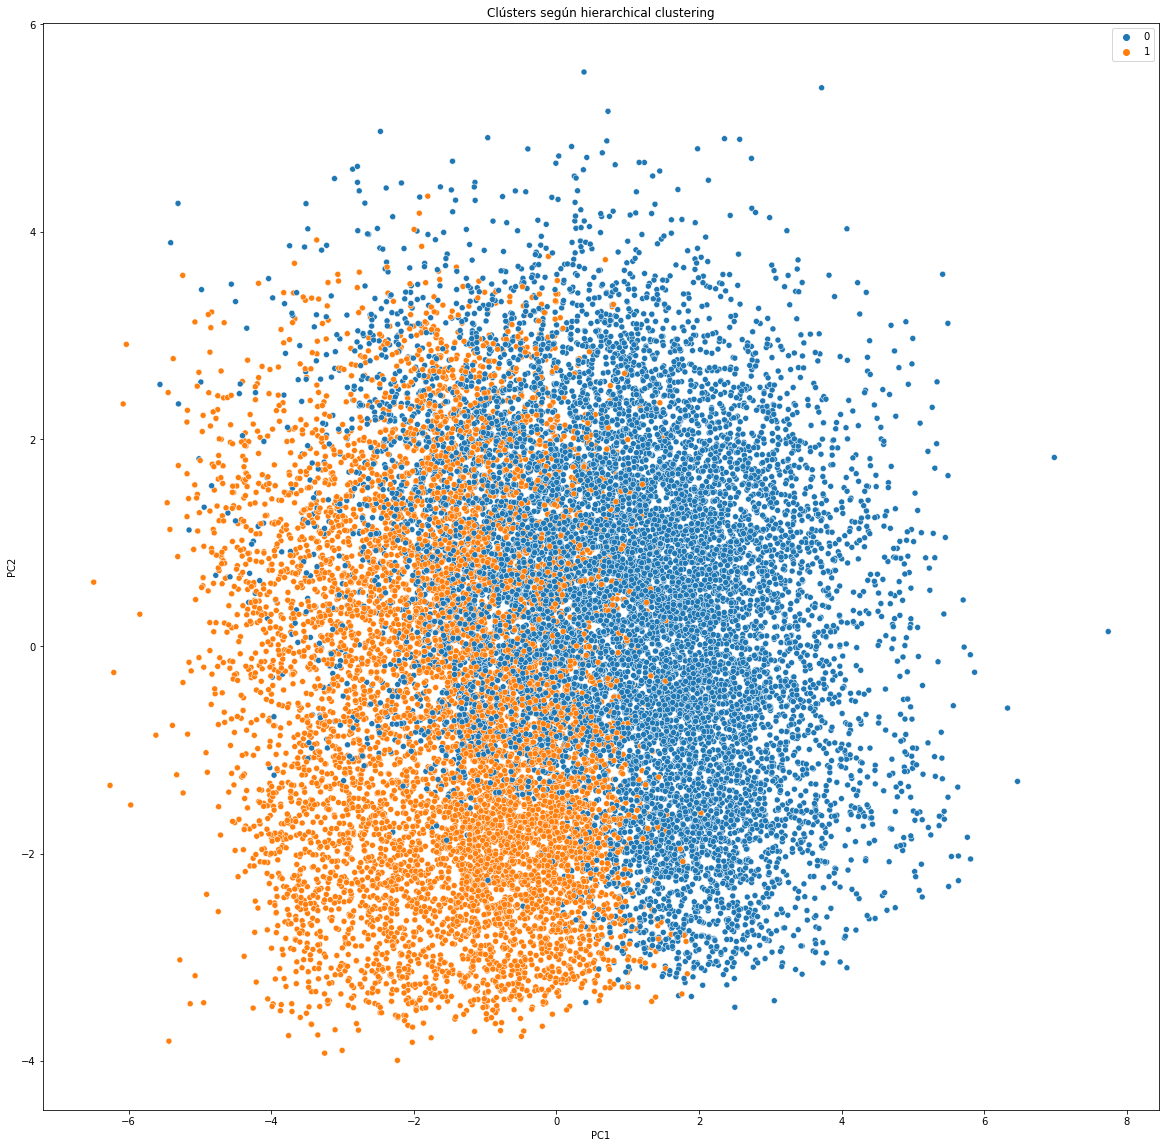

In [52]:
sample_plot = hier_df.sample(frac=0.01, random_state=42)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(x=sample_plot[1], y=sample_plot[2], hue=hier.labels_)
ax.set_title("Clústers según hierarchical clustering")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [47]:
agrupament = hier.fit_predict(cluster_df.sample(frac=0.01, random_state=42))

hier_classified = delayed_flights.sample(frac=0.01, random_state=42)
hier_classified['Group'] = agrupament
hier_classified

UniqueCarrier  FlightNum   TailNum  ActualElapsedTime  \
402118        0.195087   0.000205  0.000296          -1.420016   
1392211       0.099001   0.000287  0.000165           0.881939   
1841950       0.042400   0.000061  0.000305          -0.330510   
18373         0.195087   0.000377  0.000349           0.237229   
1798268       0.068337   0.000020  0.000214          -0.585509   
...                ...        ...       ...                ...   
1095551       0.195087   0.000044  0.000366          -0.631406   
498511        0.073234   0.000057  0.000233          -0.104722   
738580        0.195087   0.000599  0.000371          -1.563606   
103842        0.042400   0.000145  0.000247          -0.330510   
1564841       0.050824   0.000230  0.000193           1.047355   

         CRSElapsedTime   AirTime  ArrDelay  DepDelay    Origin      Dest  \
402118        -1.383976 -1.149956 -0.771355 -1.124544  0.008944  0.012965   
1392211        0.732155  0.870249  0.409939 -0.191543  0.049294  0.010196   
1841950       -0.246892 -0.220911 -0.429192 -0.523957  0.001135  0.055249   
18373         -0.062047  0.217014  0.902334  0.783724  0.038391  0.025208   
1798268       -0.605774 -0.397163  0.635316  0.665427  0.038391  0.004252   
...                 ...       ...       ...       ...       ...       ...   
1095551       -0.930570 -0.848980  0.184562 -0.591325  0.028784  0.031033   
498511         0.024430  0.117936  0.098936  0.166435  0.001111  0.036394   
738580        -1.754435 -1.386186 -0.073764 -0.663342  0.005631  0.000800   
103842        -0.246892 -0.220911  0.157218  0.132208  0.068043  0.000806   
1564841        0.947432  0.912853  0.184562 -0.591325  0.015655  0.006057   

         ...  day_W_cos  DepTime_sin  DepTime_cos  CRSDepTime_sin  \
402118   ...   0.623490     0.197657    -0.980271        0.170952   
1392211  ...  -0.222521     0.125333    -0.992115        0.131461   
1841950  ...  -0.222521    -0.068015    -0.997684       -0.081147   
18373    ...   1.000000    -0.799685     0.600420       -0.886335   
1798268  ...  -0.900969    -0.994245    -0.107132       -0.987151   
...      ...        ...          ...          ...             ...   
1095551  ...  -0.222521    -0.972370    -0.233445       -0.954056   
498511   ...  -0.900969    -0.946085     0.323917       -0.974031   
738580   ...  -0.900969    -0.987275    -0.159020       -0.993063   
103842   ...   1.000000    -0.760406    -0.649448       -0.753684   
1564841  ...   0.623490     0.598325    -0.801254        0.595515   

         CRSDepTime_cos  ArrTime_sin  ArrTime_cos  CRSArrTime_sin  \
402118        -0.985279    -0.054950    -0.998489       -0.039260   
1392211       -0.991321    -0.801254    -0.598325       -0.743145   
1841950       -0.996702    -0.511293    -0.859406       -0.394744   
18373          0.463044    -0.592013     0.805928       -0.801254   
1798268       -0.159788    -0.830012     0.557745       -0.936366   
...                 ...          ...          ...             ...   
1095551       -0.299630    -0.995805     0.091502       -0.999657   
498511         0.226414    -0.674947     0.737867       -0.785317   
738580        -0.117587    -0.996493     0.083678       -0.999229   
103842        -0.657236    -0.877565    -0.479458       -0.785317   
1564841       -0.803344    -0.036644    -0.999328        0.133121   

         CRSArrTime_cos  Group  
402118        -0.999229      1  
1392211       -0.669131      0  
1841950       -0.918791      1  
18373          0.598325      0  
1798268        0.351025      0  
...                 ...    ...  
1095551        0.026177      0  
498511         0.619094      0  
738580         0.039260      1  
103842        -0.619094      0  
1564841       -0.991100      0  

[19284 rows x 34 columns]

Al grup 1 hi han més entrades que al grup 2.

<AxesSubplot:xlabel='Group', ylabel='count'>

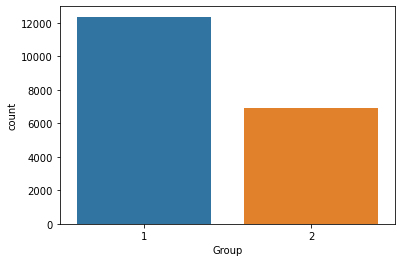

In [57]:
sns.countplot(x=hier_classified.Group+1)

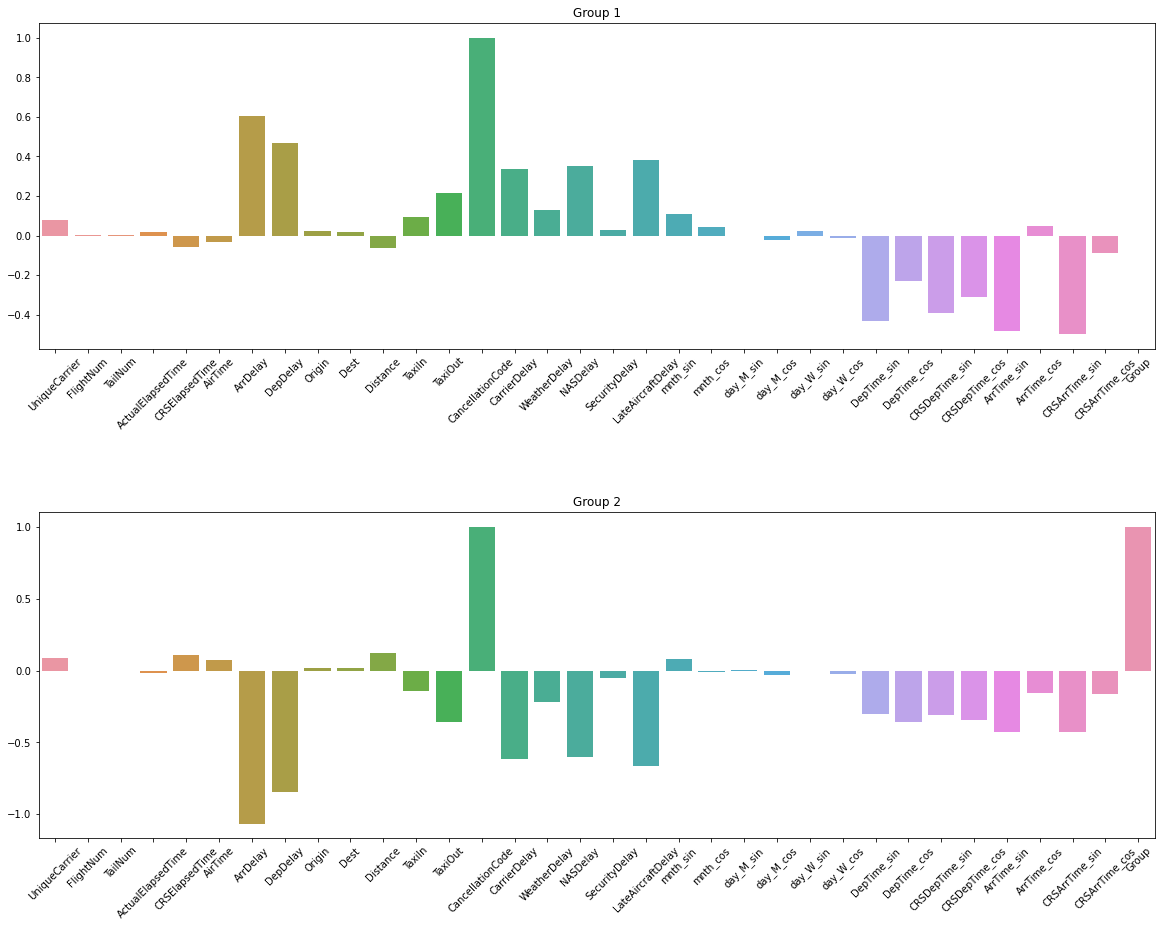

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5)

i=0
for group in np.sort(hier_classified.Group.unique()):
    means = []
    for column in hier_classified:
        means.append(hier_classified[hier_classified.Group == group][column].mean())

    sns.barplot(y=means, x=hier_classified.columns, ax=ax[i])
    ax[i].set_title(f'Group {group+1}')
    ax[i].set_xticklabels(labels=hier_classified.columns, rotation=45)
    i+=1

Al grup 1 sembla que els vols més retrasats tenen el protagonisme, mentres que al grup 2 sembla que siguin els menys retrasats.

En aparença semblaria que el model jeràrquic ha fet una divisió entre aquells vols més retrasats i els que menys.

- Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [58]:
kmeans_labels = kmeans.predict(cluster_df)
silhouette_kmeans = silhouette_score(cluster_df, kmeans_labels, sample_size=19283, random_state=42)

In [59]:
silhouette_kmeans

0.10796276474071678

In [64]:
hier_labels = hier.fit_predict(cluster_df.sample(frac=0.01, random_state=42))
silhouette_hier = silhouette_score(cluster_df.sample(frac=0.01, random_state=42), hier_labels)

In [65]:
silhouette_hier

0.09133417590331627

Els resultats que ens dóna el coeficient silhouette son pareguts als dos models, ambdós fan una asignació decent de les observacions. El model de kmeans performa un mica millor que el jeràrquic.